In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
X = np.load('features.npy')
print(X.shape)

(35887, 2304)


In [5]:
Y = np.load('labels.npy')
print(Y.shape)

(35887,)


In [6]:
from keras.utils import np_utils
Y= np_utils.to_categorical(Y, num_classes=7)
print(Y.shape)

(35887, 7)


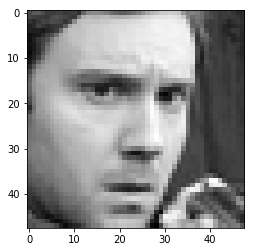

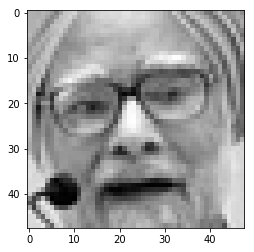

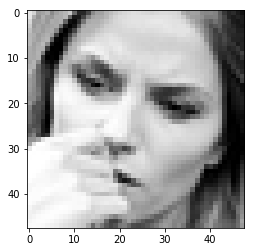

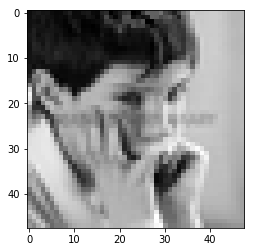

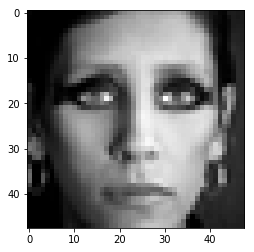

In [7]:
for i in range(5) :
    plt.figure(i)
    plt.imshow(X[i].reshape(48,48),cmap = 'gray')
plt.show()

In [8]:
X_ = X.reshape(X.shape[0],48,48,1)

In [18]:
print(X_.shape)

(35887, 48, 48, 1)


In [57]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout

In [58]:
model = Sequential()
model.add(Convolution2D(16, kernel_size = (3,3), activation ='relu', input_shape= (48,48,1),data_format = "channels_last"))
model.add(Convolution2D(32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(128, kernel_size = (3,3), activation = 'relu'))


model.add(Flatten())
model.add(Dropout(rate = 0.3))

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(7,activation  = 'softmax'))

model.compile(loss= 'binary_crossentropy' , optimizer='adam' , metrics=['accuracy'] )
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 46, 46, 16)        160       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 44, 44, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
__________

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val= train_test_split(X_,Y,test_size=0.20,random_state=0,shuffle = True)

In [60]:
print('X_train.shape : ', X_train.shape,'  ','Y_train.shape : ',Y_train.shape)
print('X_val.shape : ', X_val.shape,'  ','Y_val.shape : ',Y_val.shape)

X_train.shape :  (28709, 48, 48, 1)    Y_train.shape :  (28709, 7)
X_val.shape :  (7178, 48, 48, 1)    Y_val.shape :  (7178, 7)


In [ ]:
hist = model.fit(X_train,Y_train, batch_size = 16,validation_data = (X_val,Y_val), epochs=20)

Train on 28709 samples, validate on 7178 samples
Epoch 1/20
28709/28709 [==============================] - 236s - loss: 0.3640 - acc: 0.8646 - val_loss: 0.3154 - val_acc: 0.8783
Epoch 2/20
  160/28709 [..............................] - ETA: 216s - loss: 0.3084 - acc: 0.8830

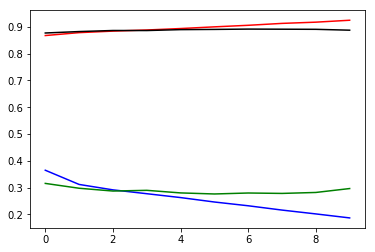

In [55]:
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.plot(hist.history['loss'],'b')
plt.plot(hist.history['val_loss'],'g')
plt.show()